In [1]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='E:/project/3-2/UrbanSound8K/audio/fold5/100263-2-0-3.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [2]:
print(librosa_audio_data)

[ 0.00331575  0.00467553  0.00361099 ... -0.00376796 -0.00347471
 -0.00357828]


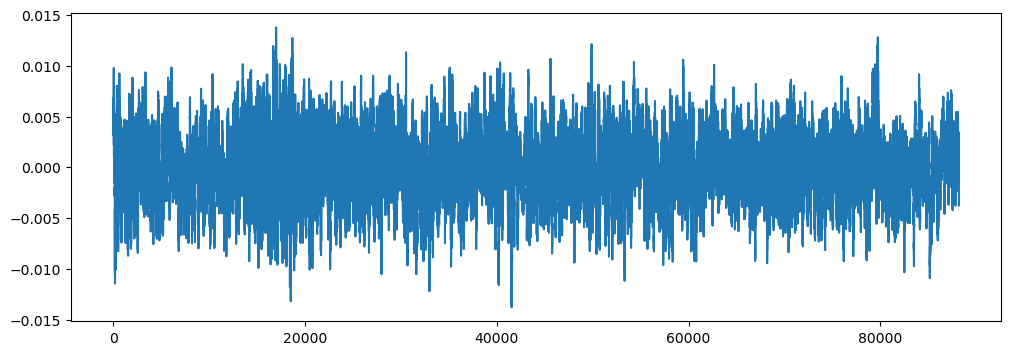

In [3]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [4]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [5]:
wave_audio

array([[ 194,  100],
       [ 179,  113],
       [ 160,  124],
       ...,
       [-143,  -87],
       [-134,  -91],
       [-110,  -98]], dtype=int16)

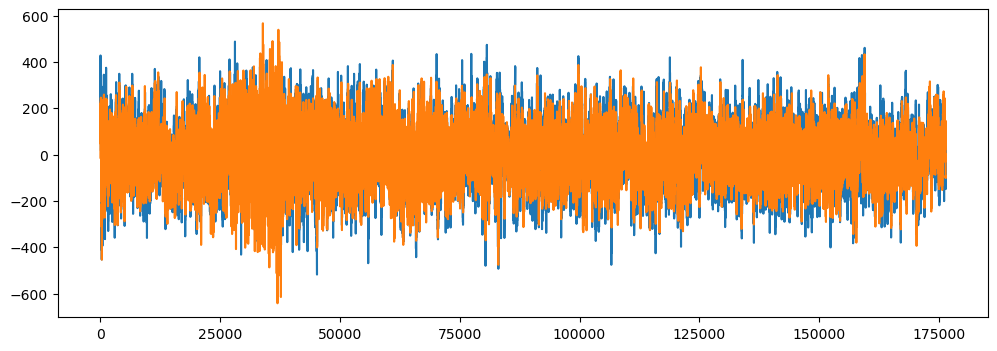

In [6]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)


In [7]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [8]:
mfccs

array([[-4.7486273e+02, -4.5088608e+02, -4.4905338e+02, ...,
        -4.7676157e+02, -4.7334869e+02, -4.9085260e+02],
       [ 1.1530264e+02,  1.1144249e+02,  1.1125224e+02, ...,
         1.1112500e+02,  1.1057970e+02,  1.0299150e+02],
       [-1.8326149e+01, -2.4682453e+01, -3.0259777e+01, ...,
        -8.2357616e+00, -9.0665359e+00, -4.5019574e+00],
       ...,
       [-2.8760440e+00, -3.2479763e+00, -4.8965540e+00, ...,
        -5.2023709e-01,  3.5672522e+00,  7.4937577e+00],
       [-4.2968404e-01, -5.8838767e-01, -8.1724083e-01, ...,
         1.8340704e-01,  7.6732349e-01,  2.7120023e+00],
       [-1.1780632e+00,  6.9809473e-01,  6.3521624e+00, ...,
        -2.6221921e+00, -4.7912703e+00, -3.1826310e+00]], dtype=float32)

In [9]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='E:/project/3-2/UrbanSound8K/audio/'
metadata=pd.read_csv('E:/project/3-2/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [10]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [11]:
!pip install resampy


In [12]:
pip install librosa numpy


Note: you may need to restart the kernel to use updated packages.


In [13]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [04:35, 14.95it/s]C:\Users\HRUSHIKESH\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8325it [10:02, 21.24it/s]C:\Users\HRUSHIKESH\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\HRUSHIKESH\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [10:30, 13.85it/s]


In [14]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [45]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [46]:
X.shape

(8732, 40)

In [47]:
#y=np.array(pd.get_dummies(y))
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [19]:
y.shape

(8732, 10)

In [48]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [49]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [20]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [26]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665260e+00, -1.36902368e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305033e+00, -5.27745247e+00, -1.55697143e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920465e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641389e-01,  7.33490825e-01,  7.11009085e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155220e+01, ...,
         1.46811950e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066067e+00, ...,
        -5.38886690e+00, -3.37136054e+00, -1.56651139e+00]], dtype=float32)

In [27]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [22]:
X_train.shape

(6985, 40)

In [23]:
X_test.shape

(1747, 40)

In [24]:
y_train.shape

(6985, 10)

In [25]:
y_test.shape

(1747, 10)

In [28]:
#model

In [29]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [31]:
### No of classes
num_labels=y.shape[1]

In [33]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

C:\Users\HRUSHIKESH\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           4,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,410 (177.38 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [58]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7498 - loss: 0.7577
Epoch 1: val_loss improved from inf to 0.63885, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7497 - loss: 0.7580 - val_accuracy: 0.7985 - val_loss: 0.6388
Epoch 2/100
209/219 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7378 - loss: 0.8069
Epoch 2: val_loss did not improve from 0.63885
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7380 - loss: 0.8064 - val_accuracy: 0.7876 - val_loss: 0.6575
Epoch 3/100
213/219 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7366 - loss: 0.7803
Epoch 3: val_loss improved from 0.63885 to 0.63526, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7366 - loss: 0.7807 - val_accuracy: 0.7974 - val_loss: 0.6353
Epoch 4/100
208/219 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7464 - loss: 0.7852
Epoch 4: val_loss improved from 0.63526 to

Epoch 26/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7474 - loss: 0.7699
Epoch 26: val_loss did not improve from 0.61653
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7474 - loss: 0.7700 - val_accuracy: 0.7922 - val_loss: 0.6347
Epoch 27/100
209/219 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7446 - loss: 0.7876
Epoch 27: val_loss did not improve from 0.61653
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7447 - loss: 0.7877 - val_accuracy: 0.7956 - val_loss: 0.6282
Epoch 28/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7483 - loss: 0.7559
Epoch 28: val_loss did not improve from 0.61653
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7483 - loss: 0.7560 - val_accuracy: 0.8060 - val_loss: 0.6448
Epoch 29/100
214/219 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7425 - loss: 0.7739
Epoch 29: val_loss did not improve from 0.61653
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7426 - loss: 0.7743 - val_accuracy: 0.7985 - val_l

Epoch 77/100
209/219 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7443 - loss: 0.7596
Epoch 77: val_loss did not improve from 0.60072
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7445 - loss: 0.7596 - val_accuracy: 0.8014 - val_loss: 0.6332
Epoch 78/100
210/219 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7541 - loss: 0.7287
Epoch 78: val_loss did not improve from 0.60072
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7541 - loss: 0.7295 - val_accuracy: 0.7956 - val_loss: 0.6242
Epoch 79/100
214/219 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7488 - loss: 0.7933
Epoch 79: val_loss did not improve from 0.60072
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7487 - loss: 0.7932 - val_accuracy: 0.8025 - val_loss: 0.6281
Epoch 80/100
214/219 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7580 - loss: 0.7521
Epoch 80: val_loss did not improve from 0.60072
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7579 - loss: 0.7526 - val_accuracy: 0.7962 - val_l

In [59]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8070979118347168


In [ ]:
#testing

In [64]:
filename='E:/project/3-2/UrbanSound8K/siren.wav'
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
# Predict probabilities
prediction_probabilities = model.predict(mfccs_scaled_features)

# Determine the predicted class
predicted_label = np.argmax(prediction_probabilities, axis=1)

# Print predicted label
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-2.8544849e+02  1.7805194e+02 -3.1780960e+01 -2.0345325e+01
 -3.4941639e+01  8.8581924e+00  3.0367207e+01  4.4306152e+01
  5.1754880e-01 -4.0764570e+00 -1.2237082e+01 -6.6355997e-01
 -7.3761792e+00 -2.8389685e+00 -2.2041144e+00 -7.6343179e+00
 -3.0431151e+00  7.0664191e+00  8.4038572e+00 -3.9847097e+00
 -1.2377978e+01 -1.0663234e+01 -3.6894283e+00  3.8769822e+00
  3.2035917e-01 -7.2046876e+00 -2.1401808e-01  1.2925326e+00
  2.5337899e+00 -2.4855747e+00 -7.9870267e+00 -1.1692441e+01
 -2.3041329e+00  3.0011218e+00  3.6147718e+00 -2.0595627e+00
 -5.6367331e+00  2.5262294e+00 -2.9079831e+00 -6.4257755e+00]
[[-2.8544849e+02  1.7805194e+02 -3.1780960e+01 -2.0345325e+01
  -3.4941639e+01  8.8581924e+00  3.0367207e+01  4.4306152e+01
   5.1754880e-01 -4.0764570e+00 -1.2237082e+01 -6.6355997e-01
  -7.3761792e+00 -2.8389685e+00 -2.2041144e+00 -7.6343179e+00
  -3.0431151e+00  7.0664191e+00  8.4038572e+00 -3.9847097e+00
  -1.2377978e+01 -1.0663234e+01 -3.6894283e+00  3.8769822e+00
   3.2035917e-01 

array(['siren'], dtype='<U16')